<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/classification/example-multiclass-classification.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(multiclass-classification)=
# Example: Multiclass Classification Problem

This example is taken from Section 4.2 of the book "Deep Learning with Python" by François Chollet.

The Reuters dataset is a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. 

## Step 1: Load the data

In [1]:
from tensorflow.keras.datasets import reuters 

(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

`train_data` and `test_data`: lists of news stories, each story being a list of word indices (encoding a sequence of words).

`train_labels` and `test_labels`: The label associated with an example is an integer between 0 and 45—a topic index.

In [2]:
story_idx = 100
print(train_data[story_idx])
print(train_labels[story_idx])

[1, 367, 1394, 169, 65, 87, 209, 30, 306, 228, 10, 803, 305, 96, 5, 196, 15, 10, 523, 2, 3006, 293, 484, 2, 1440, 5825, 8, 145, 7, 10, 1670, 6, 10, 294, 517, 237, 2, 367, 8042, 7, 2477, 1177, 483, 1440, 5825, 8, 367, 1394, 4, 169, 387, 66, 209, 30, 2344, 652, 1496, 9, 209, 30, 2564, 228, 10, 803, 305, 96, 5, 196, 15, 51, 36, 1457, 24, 1345, 5, 4, 196, 150, 10, 523, 320, 64, 992, 6373, 13, 367, 190, 297, 64, 85, 1692, 6, 8656, 122, 9, 36, 1457, 24, 269, 4753, 27, 367, 212, 114, 45, 30, 3292, 7, 126, 2203, 13, 367, 6, 1818, 4, 169, 65, 96, 28, 432, 23, 189, 1254, 4, 9725, 320, 5, 196, 15, 10, 523, 25, 730, 190, 57, 64, 6, 9953, 2016, 6373, 7, 2, 122, 1440, 5825, 8, 269, 4753, 1217, 7, 608, 2203, 30, 3292, 1440, 5825, 8, 43, 339, 43, 231, 9, 667, 1820, 126, 212, 4197, 21, 1709, 249, 311, 13, 260, 489, 9, 65, 4753, 64, 1209, 4397, 249, 954, 36, 152, 1440, 5825, 506, 24, 135, 367, 311, 34, 420, 4, 8407, 200, 1519, 13, 137, 730, 190, 7, 104, 570, 52, 64, 2492, 7725, 4, 642, 5, 405, 7725, 249

The `reuters` object has a method `get_word_index` that returns a dictionary mapping words to an integer index.

In [3]:
news_idx = 0

word_index = reuters.get_word_index() 

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[news_idx]])

print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
# the words indices range from 1 to 9999
print(min(min(seq) for seq in train_data))
print(max(max(seq) for seq in train_data))

print(reverse_word_index[1])
print(word_index["the"])


1
9999
the
1


## Step 2: Preprocess the data

In this step, we will convert the lists of integers into tensors that our neural network can process. 

We will implement **multi-hot-encoding** - a binary representation commonly used in NLP - to transform our lists into vectors of 0s and 1s. Each resulting tensor will be a 10,000-element vector where:

* 1 indicates the word appears in the review
* 0 indicates the word is absent

This representation creates a standardized format that our model can efficiently process while preserving the essential information about word presence in each review.



In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        for j in sequence:  
            results[i, j] = 1.
    return results 

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)



In [6]:

# check that the vectorized data is correct
for i in train_data[0]: 
    if x_train[0, i] != 1.0: 
        print(f"i={i} x_train[0, {i}]={x_train[0, i]}")

# test your understanding: why are these values not the same? 
print(sum(x_train[0]))
print(len(train_data[0]))


57.0
87


In [7]:
print(train_labels)

[ 3  4  3 ... 25  3 25]


In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels): 
        results[i, label] = 1.
        
    return results 
    
y_train = to_one_hot(train_labels) 
y_test = to_one_hot(test_labels)

In [9]:
print(y_train[100])

print(train_labels[100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
20


In [10]:
# Note that there is a built-in way to do this in Keras:

from tensorflow.keras.utils import to_categorical 

y_train = to_categorical(train_labels) 
y_test = to_categorical(test_labels)

In [11]:
print(y_train[100])

print(train_labels[100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
20


## Step 3: Build the model

### Softmax

Given a vector of raw predictions (logits) $z = (z_1, z_2, \dots, z_n)$, the softmax function $\sigma(z)$ is defined as:

$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

where:

* $\sigma(z)_i$ is the predicted probability for the $i^{\text{th}}$ class.
* The probabilities satisfy $\sum_{i=1}^{n} \sigma(z)_i = 1$.


In [12]:
import numpy as np

def softmax(z):
    exp_z = np.exp(z)   
    return exp_z / np.sum(exp_z)

# Example usage:
logits = np.array([-20.0, -1.0, -1.1])
probabilities = softmax(logits)
print(probabilities)   
print(np.sum(probabilities))  # the sum of the probabilities should be 1

[2.94135151e-09 5.24979186e-01 4.75020811e-01]
1.0


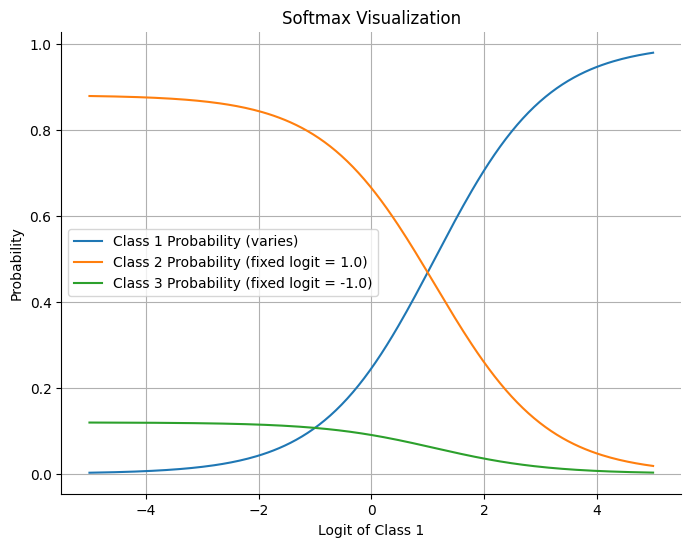

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Varying the logit of class 1, fix logits for class 2 and class 3 at distinct values
logits_class1 = np.linspace(-5, 5, 200)
fixed_logit_class2 = 1.0  
fixed_logit_class3 = -1.0 

probabilities = np.array([
    softmax([z, fixed_logit_class2, fixed_logit_class3]) 
    for z in logits_class1
])

plt.figure(figsize=(8, 6))
plt.plot(logits_class1, probabilities[:, 0], label='Class 1 Probability (varies)')
plt.plot(logits_class1, probabilities[:, 1], label=f'Class 2 Probability (fixed logit = {fixed_logit_class2})')
plt.plot(logits_class1, probabilities[:, 2], label=f'Class 3 Probability (fixed logit = {fixed_logit_class3})')

plt.xlabel("Logit of Class 1")
plt.ylabel("Probability")
plt.title("Softmax Visualization")
plt.grid(True)
sns.despine()
plt.legend()
plt.show()


### Categorical Crossentropy

Categorical cross-entropy is a loss function commonly used to train neural networks for multi-class classification problems, where each instance belongs to exactly one category.

Intuition: It measures how far away your model's predicted probabilities are from the true labels. A smaller loss means your model's predictions are close to the true labels, while a larger loss means predictions are far away.

Given:

* True labels: $y = (y_1, y_2, \dots, y_n)$, represented as a one-hot vector, where exactly one element is $1$ (the true class), and all others are $0$.
* Predicted probabilities: $\hat{y} = (\hat{y}_1, \hat{y}_2, \dots, \hat{y}_n)$, output by the softmax function.
 
The categorical cross-entropy loss is:

$$
\text{Loss} = -\sum_{i=1}^{n} y_i \log(\hat{y}_i)
$$

Since only the true class label $y_i = 1$ contributes, this simplifies to:

$$
\text{Loss} = -\log(\hat{y}_{\text{true class}})
$$


In [14]:
import numpy as np

def categorical_crossentropy(y_true, y_pred):
    # Ensure numerical stability by adding a tiny epsilon
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred))

# Example usage:
y_true = np.array([0, 0.5, 0.5])   
y_pred = np.array([0.0, 1.0, 0.0])  
loss = categorical_crossentropy(y_true, y_pred)
print(loss)   


17.269388197455342


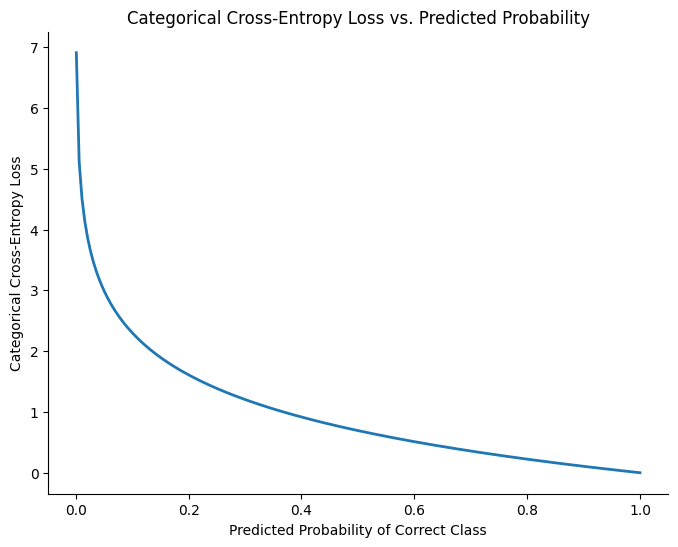

In [15]:

prob_correct = np.linspace(0.001, 1.0, 200)

loss_values = []
for p in prob_correct:
    y_true = np.array([1, 0, 0])            # True class is class 1
    y_pred = np.array([p, (1 - p)/2, (1 - p)/2])  # Remaining probability split evenly
    loss = categorical_crossentropy(y_true, y_pred)
    loss_values.append(loss)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(prob_correct, loss_values, label='Cross-Entropy Loss', linewidth=2)

plt.xlabel('Predicted Probability of Correct Class')
plt.ylabel('Categorical Cross-Entropy Loss')
plt.title('Categorical Cross-Entropy Loss vs. Predicted Probability')
plt.grid(False)
sns.despine()
plt.show()


### Defining the Model

In [16]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

2025-04-15 08:34:12.299852: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-04-15 08:34:12.299874: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2025-04-15 08:34:12.299877: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
I0000 00:00:1744720452.299889 17855213 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1744720452.299908 17855213 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Step 4: Train the model


In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

We will train the model for 20 epochs in mini-batches of 512 samples.

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val), 
                    verbose=0)

2025-04-15 08:34:12.710900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


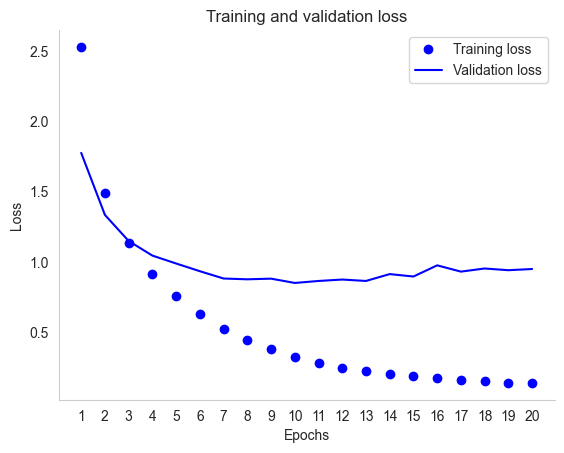

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("whitegrid")
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, "bo", label="Training loss") 
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

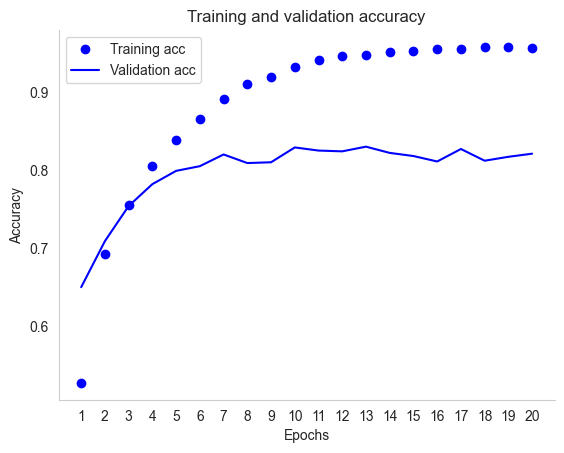

In [20]:
acc = history_dict["accuracy"]

val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Accuracy") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

In [21]:
model = keras.Sequential([
    Dense(64, activation="relu"), 
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512, verbose=0) 
results = model.evaluate(x_test, y_test)

print(f"The test loss is {results[0]}")
print(f"The test accuracy is {results[1]}")


 1/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.8438 - loss: 0.6172

 8/71 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8092 - loss: 0.9173  

15/71 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8164 - loss: 0.8860

22/71 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8146 - loss: 0.8815

30/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8124 - loss: 0.8811

38/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8093 - loss: 0.8826

45/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8073 - loss: 0.8819

53/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8059 - loss: 0.8812

60/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8052 - loss: 0.8823

68/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8046 - loss: 0.8833

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8042 - loss: 0.8843


The test loss is 0.9044827818870544
The test accuracy is 0.7974176406860352


### Prediction  

In [22]:
predictions = model.predict(x_test[0:5])

story_idx = 4
# Each entry in “predictions” is a vector of length 46:
print(predictions[story_idx].shape)

print(predictions[story_idx])
# The coefficients in this vector sum to 1, as they form a probability distribution:
print(np.sum(predictions[story_idx]))

# The largest entry is the predicted class—the class with the highest probability:
print(np.argmax(predictions[story_idx]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


(46,)
[3.23569169e-04 6.99929241e-03 2.61520414e-04 5.74482139e-04
 1.27537234e-03 9.82107711e-04 1.70128144e-04 1.01320824e-04
 3.24195862e-05 5.43329166e-04 9.91055786e-05 3.03043926e-04
 7.93274230e-05 9.49151754e-01 1.33472541e-03 1.69136809e-04
 1.83401275e-02 5.53587393e-04 2.30378192e-03 1.50772918e-03
 2.91558768e-04 2.50895595e-04 4.06442559e-04 3.10103642e-05
 9.15770433e-05 1.35729404e-03 8.87733913e-05 2.92581681e-05
 2.67229188e-05 5.21957445e-05 1.07154185e-04 8.09169782e-04
 1.28054654e-03 2.44894950e-03 1.56408816e-03 3.64423249e-05
 1.86745179e-04 5.28048186e-05 2.27627301e-04 2.93419398e-05
 2.05353694e-03 3.21682310e-03 5.19582500e-05 1.33730864e-04
 8.54123937e-06 6.09960116e-05]
1.0000001
13


Some things to try: 

* Check the accuracy of a purely random classifier
* Try using different optimizers: `adam` or `sgd`
* Try using larger or smaller layers: 32 units, 128 units, and so on.
* True using a single intermediate layer, or three intermediate layers.



In [23]:
model = keras.Sequential([
    Dense(4, activation="relu"), 
    Dense(4, activation="relu"), 
    Dense(4, activation="relu"), 
    Dense(4, activation="relu"), 
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512, verbose=0) 
results = model.evaluate(x_test, y_test)

print(f"The test loss is {results[0]}")
print(f"The test accuracy is {results[1]}")
print("The predictions are:")   
print(model.predict(x_test))

 1/71 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.5312 - loss: 1.9619

 8/71 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5607 - loss: 2.0107  

15/71 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5635 - loss: 1.9807

23/71 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5626 - loss: 1.9790

31/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5595 - loss: 1.9823

39/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5567 - loss: 1.9888

46/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5555 - loss: 1.9916

53/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5543 - loss: 1.9944

60/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5532 - loss: 1.9987

67/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5524 - loss: 2.0021

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5517 - loss: 2.0049


The test loss is 2.045971393585205
The test accuracy is 0.5422974228858948
The predictions are:


 1/71 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step

32/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[[0.00024138 0.00382641 0.00648333 ... 0.000593   0.00067503 0.01010856]
 [0.03377473 0.07325106 0.00306531 ... 0.00943849 0.02167345 0.00199653]
 [0.02253167 0.06462821 0.00933696 ... 0.01116764 0.01869752 0.00667867]
 ...
 [0.00107105 0.00225876 0.01161925 ... 0.0037241  0.00270335 0.03066804]
 [0.00356301 0.03370343 0.01697209 ... 0.0038922  0.00536941 0.01524064]
 [0.02676003 0.05442549 0.01203227 ... 0.01650025 0.02449574 0.0108468 ]]
